# Kings County Housing Prices Bakeoff

Below are a list of steps that you should take while trying to complete your bake-off entry.

## Step 1: Read in Data

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv('kc_house_data_train.csv', index_col=False)

## Step 2: Exploratory Data Analysis 
    
Become familiar with the data.  Look to see if there are any extreme values.  

Additionally create data visualizations to determine if there are any relationships between your features and your target variables.  

In [3]:
print(df.shape)
df.head()

(17290, 22)


,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [4]:
column_names = df.columns
print(column_names)
df.dtypes

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
df['bedrooms'].value_counts()

3     7864
4     5488
2     2204
5     1283
6      229
1      160
7       30
0       12
8       10
9        5
10       3
11       1
33       1
Name: bedrooms, dtype: int64

1. get rid of outliers
2. get the data on the same scale  - (normalize)
3. what makes sense? what do i believe would be an effective predictor - is this true?
4.  consider interactions

In [6]:
df.drop(columns= 'Unnamed: 0', inplace=True)

In [7]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [8]:
target = df['price']

In [21]:
location_data = ['sqft_living', 'sqft_lot', 'waterfront', 'view', 'sqft_above', 'sqft_basement', 'zipcode', 
                 'lat', 'long', 'sqft_living15', 'sqft_lot15']

In [22]:
df[location_data].corr()

,sqft_living,sqft_lot,waterfront,view,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15
sqft_living,1.000000,0.166810,0.109738,0.283336,0.876696,0.435529,-0.195893,0.052646,0.234453,0.755066,0.179570
sqft_lot,0.166810,1.000000,0.015356,0.073058,0.180755,0.008065,-0.126590,-0.082029,0.226190,0.136959,0.701875
waterfront,0.109738,0.015356,1.000000,0.407565,0.077162,0.083433,0.034282,-0.013331,-0.042728,0.091090,0.026895
view,0.283336,0.073058,0.407565,1.000000,0.164747,0.279939,0.089475,0.003820,-0.077572,0.279999,0.073185
sqft_above,0.876696,0.180755,0.077162,0.164747,1.000000,-0.051199,-0.259745,0.001374,0.338192,0.731077,0.193874
sqft_basement,0.435529,0.008065,0.083433,0.279939,-0.051199,1.000000,0.079368,0.106727,-0.146112,0.199521,0.010007
zipcode,-0.195893,-0.126590,0.034282,0.089475,-0.259745,0.079368,1.000000,0.264712,-0.563027,-0.273903,-0.145921
lat,0.052646,-0.082029,-0.013331,0.003820,0.001374,0.106727,0.264712,1.000000,-0.131514,0.054175,-0.086265
long,0.234453,0.226190,-0.042728,-0.077572,0.338192,-0.146112,-0.563027,-0.131514,1.000000,0.327882,0.253981
sqft_living15,0.755066,0.136959,0.091090,0.279999,0.731077,0.199521,-0.273903,0.054175,0.327882,1.000000,0.178533


In [23]:
corr = df[location_data].corr()

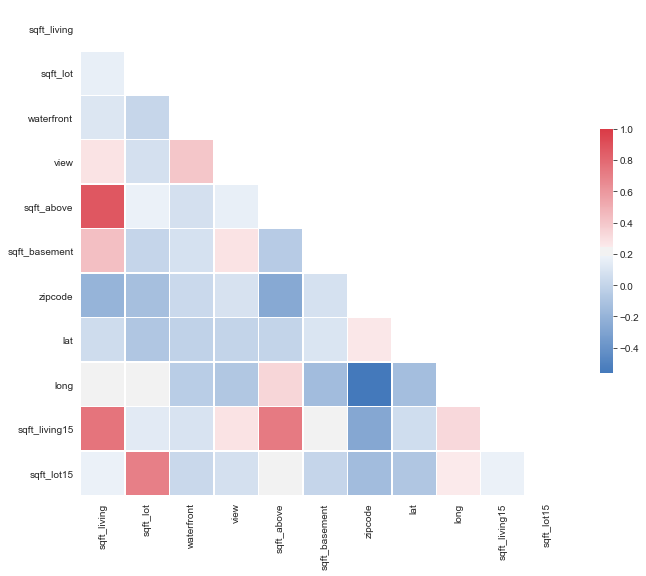

In [24]:
def CorrMtx(df, dropDuplicates = True):

    if dropDuplicates:    
        mask = np.zeros_like(df[location_data], dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df[location_data], mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(corr, dropDuplicates = True)

In [25]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [26]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built', 'yr_renovated',
           'zipcode', 'lat', 'long']

In [27]:
df['price'] = df['price']/1000

In [71]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,no_outlier_bedrooms
0,2591820310,20141006T000000,365.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,True
1,7974200820,20140821T000000,865.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,True
2,7701450110,20140815T000000,1038.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,True
3,9522300010,20150331T000000,1490.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,True
4,9510861140,20140714T000000,711.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,True


## Step 3: Clean up any issues with the data like extreme values.  

remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout dataset, and you can't just delete those rows and not have a prediction for it. 

## Step 4: Generate new features that you think could be important

After doing this, you will want to go back to steps 2 and 3 to investigates these new features

In [28]:
mod1_df = df[features]

In [29]:
mod1_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,yr_renovated,zipcode,lat,long
0,4,2.25,2070,8893,2.0,1986,0,98058,47.4388,-122.162
1,5,3.00,2900,6730,1.0,1977,0,98115,47.6784,-122.285
2,4,2.50,3770,10893,2.0,1997,0,98006,47.5646,-122.129
3,3,3.50,4560,14608,2.0,1990,0,98034,47.6995,-122.228
4,3,2.50,2550,5376,2.0,2004,0,98052,47.6647,-122.083


In [30]:
from sklearn.linear_model import LinearRegression

#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(mod1_df, target)

#access output
print(lm.intercept_)
print(lm.coef_)
print("R^2: ", lm.score(mod1_df, target))

797.627439694506
[-6.13668478e+01  5.16195112e+01  3.02379146e-01  7.95479179e-06
  3.40561628e+01 -2.30858897e+00  2.62148804e-02 -6.43598170e-01
  6.49502968e+02 -2.94080939e+02]
R^2:  0.6140004149295706


In [39]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)


In [40]:
poly_data = poly.fit_transform(mod1_df)

In [41]:
poly_columns = poly.get_feature_names(mod1_df.columns)

In [45]:
mod1_poly = pd.DataFrame(poly_data, columns=poly_columns)

In [46]:
mod1_poly.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,yr_renovated,zipcode,lat,long,bedrooms^2,bedrooms bathrooms,bedrooms sqft_living,bedrooms sqft_lot,bedrooms floors,bedrooms yr_built,bedrooms yr_renovated,bedrooms zipcode,bedrooms lat,bedrooms long,bathrooms^2,bathrooms sqft_living,bathrooms sqft_lot,bathrooms floors,bathrooms yr_built,bathrooms yr_renovated,bathrooms zipcode,bathrooms lat,bathrooms long,sqft_living^2,sqft_living sqft_lot,sqft_living floors,sqft_living yr_built,sqft_living yr_renovated,sqft_living zipcode,sqft_living lat,sqft_living long,sqft_lot^2,sqft_lot floors,sqft_lot yr_built,sqft_lot yr_renovated,sqft_lot zipcode,sqft_lot lat,sqft_lot long,floors^2,floors yr_built,floors yr_renovated,floors zipcode,floors lat,floors long,yr_built^2,yr_built yr_renovated,yr_built zipcode,yr_built lat,yr_built long,yr_renovated^2,yr_renovated zipcode,yr_renovated lat,yr_renovated long,zipcode^2,zipcode lat,zipcode long,lat^2,lat long,long^2
0,4.0,2.25,2070.0,8893.0,2.0,1986.0,0.0,98058.0,47.4388,-122.162,16.0,9.0,8280.0,35572.0,8.0,7944.0,0.0,392232.0,189.7552,-488.648,5.0625,4657.5,20009.25,4.5,4468.5,0.0,220630.5,106.73730,-274.8645,4284900.0,18408510.0,4140.0,4111020.0,0.0,202980060.0,98198.316,-252875.34,79085449.0,17786.0,17661498.0,0.0,8.720298e+08,421873.2484,-1086386.666,4.0,3972.0,0.0,196116.0,94.8776,-244.324,3944196.0,0.0,194743188.0,94213.4568,-242613.732,0.0,0.0,0.0,-0.0,9.615371e+09,4.651754e+06,-1.197896e+07,2250.439745,-5795.218686,14923.554244
1,5.0,3.00,2900.0,6730.0,1.0,1977.0,0.0,98115.0,47.6784,-122.285,25.0,15.0,14500.0,33650.0,5.0,9885.0,0.0,490575.0,238.3920,-611.425,9.0000,8700.0,20190.00,3.0,5931.0,0.0,294345.0,143.03520,-366.8550,8410000.0,19517000.0,2900.0,5733300.0,0.0,284533500.0,138267.360,-354626.50,45292900.0,6730.0,13305210.0,0.0,6.603140e+08,320875.6320,-822978.050,1.0,1977.0,0.0,98115.0,47.6784,-122.285,3908529.0,0.0,193973355.0,94260.1968,-241757.445,0.0,0.0,0.0,-0.0,9.626553e+09,4.677966e+06,-1.199799e+07,2273.229827,-5830.353144,14953.621225
2,4.0,2.50,3770.0,10893.0,2.0,1997.0,0.0,98006.0,47.5646,-122.129,16.0,10.0,15080.0,43572.0,8.0,7988.0,0.0,392024.0,190.2584,-488.516,6.2500,9425.0,27232.50,5.0,4992.5,0.0,245015.0,118.91150,-305.3225,14212900.0,41066610.0,7540.0,7528690.0,0.0,369482620.0,179318.542,-460426.33,118657449.0,21786.0,21753321.0,0.0,1.067579e+09,518121.1878,-1330351.197,4.0,3994.0,0.0,196012.0,95.1292,-244.258,3988009.0,0.0,195717982.0,94986.5062,-243891.613,0.0,0.0,0.0,-0.0,9.605176e+09,4.661616e+06,-1.196937e+07,2262.391173,-5809.017033,14915.492641
3,3.0,3.50,4560.0,14608.0,2.0,1990.0,0.0,98034.0,47.6995,-122.228,9.0,10.5,13680.0,43824.0,6.0,5970.0,0.0,294102.0,143.0985,-366.684,12.2500,15960.0,51128.00,7.0,6965.0,0.0,343119.0,166.94825,-427.7980,20793600.0,66612480.0,9120.0,9074400.0,0.0,447035040.0,217509.720,-557359.68,213393664.0,29216.0,29069920.0,0.0,1.432081e+09,696794.2960,-1785506.624,4.0,3980.0,0.0,196068.0,95.3990,-244.456,3960100.0,0.0,195087660.0,94922.0050,-243233.720,0.0,0.0,0.0,-0.0,9.610665e+09,4.676173e+06,-1.198250e+07,2275.242300,-5830.214486,14939.683984
4,3.0,2.50,2550.0,5376.0,2.0,2004.0,0.0,98052.0,47.6647,-122.083,9.0,7.5,7650.0,16128.0,6.0,6012.0,0.0,294156.0,142.9941,-366.249,6.2500,6375.0,13440.00,5.0,5010.0,0.0,245130.0,119.16175,-305.2075,6502500.0,13708800.0,5100.0,5110200.0,0.0,250032600.0,121544.985,-311311.65,28901376.0,10752.0,10773504.0,0.0,5.271276e+08,256245.4272,-656318.208,4.0,4008.0,0.0,196104.0,95.3294,-244.166,4016016.0,0.0,196496208.0,95520.0588,-244654.332,0.0,0.0,0.0,-0.0,9.614195e+09,4.673619e+06,-1.197048e+07,2271.923626,-5819.049570,14904.258889


In [47]:

#instantiate a linear regression object
lm_2 = LinearRegression()

#fit the linear regression to the data
lm_2 = lm_2.fit(mod1_poly, target)

#access output
# print(lm_2.intercept_)
# print(lm_2.coef_)
print("R^2: ", lm_2.score(mod1_poly, target))

R^2:  0.718281911068535


## Step 5: Train Test Split

If you plan on doing any scaling of your data, make sure it is done at the apporpriate time. 

In [49]:
from sklearn.model_selection import train_test_split

#call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(mod1_poly, target, random_state=34,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)


Training set - Features:  (13832, 65) Target:  (13832,)
Test set - Features:  (3458, 65) Target:  (3458,)


In [50]:
# fit a model
from sklearn import linear_model

#instantiate a linear regression object
lm3 = linear_model.LinearRegression()

#fit the linear regression to the data
lm3 = lm.fit(X_train, y_train)


print(lm.intercept_)
print(lm.coef_)
print("R^2: ", lm_2.score(mod1_poly, target))

57758663.79448535
[ 1.63919659e+04 -2.37955341e+04  5.95059245e+00 -6.99997153e-01
 -3.52784579e+04 -2.07755505e+02  3.42168022e+01 -1.18112587e+03
  6.56046871e+04  1.89607579e+04  1.78587093e+00 -2.16897545e+00
 -3.17714344e-02  3.14561033e-05  2.11356282e+01 -3.27101047e-01
  2.89045146e-04  2.82275452e-02 -8.58399268e+01  1.18198509e+02
 -1.41456321e+01  4.68669132e-02 -6.88853744e-05 -8.44211685e+00
  5.16860193e-01 -7.20131609e-04  1.50768944e-01  8.30591413e+01
 -3.32227820e+01  2.82159072e-05 -3.94058588e-07  1.72696164e-02
 -4.40863073e-04  8.45393203e-06 -8.78043109e-04  4.54347121e-01
 -4.87012879e-01 -1.34605216e-10  2.15856396e-04  8.93013703e-06
 -2.32830644e-10  9.85765473e-06 -1.59491299e-03  1.69766299e-03
  4.30034890e+01 -1.19407876e+00 -2.02727474e-02  4.56195846e-01
  1.70750588e+00  6.04557448e+01  1.50641188e-02  5.59366537e-04
  1.01109669e-02 -4.98892167e+00  4.94268640e+00  5.25981786e-04
 -3.90590929e-04 -5.47513196e-02 -3.76130281e-02  6.85191008e-03
 -3.357

In [59]:
print ("R^2 Score:", lm.score(X_train, y_train))

R^2 Score: 0.7277482627356593


In [60]:
y_train_pred = lm.predict(X_train)

In [61]:
y_train_pred

array([368.50526822, 367.4723428 , 415.51983746, ..., 366.43345363,
       896.35787961, 226.45379829])

In [62]:
#import the metrics module from sklearn
from sklearn import metrics

train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 121.88585251293324
Mean Squared Error: 37698.1781744457
Root Mean Squared Error: 194.16018689331162


In [63]:
price_std = target.std()

print('Z-Score of Mean Absolute Error:', train_mae/price_std )
print('Z-Score of Root Mean Squared Error:' , train_rmse/price_std)

Z-Score of Mean Absolute Error: 0.3264925156531935
Z-Score of Root Mean Squared Error: 0.5200919265980032


In [64]:
y_pred = lm.predict(X_test)

Text(0, 0.5, 'Predictions')

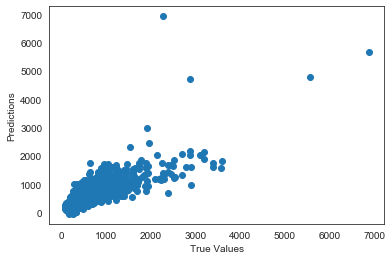

In [65]:
## The line / model
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

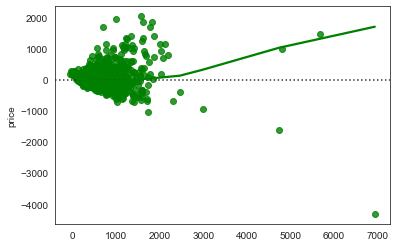

In [66]:
sns.residplot(y_pred, y_test, lowess=True, color="g")

In [67]:
print ("Score:", lm.score(X_test, y_test))


Score: 0.6661026760673192


In [68]:
test_mae = metrics.mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))


print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Mean Absolute Error:125.05454150389689
Mean Squared Error:47720.03781181919
Root Mean Squared Error:218.44916528066474


In [69]:
print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

Mean Absolute Error  Z: 0.33498040180776195
Root Mean Squared Error Z: 0.5851541917652546


In [70]:
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Training:  194 vs. Testing:  218


## Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models

## Step 7: Evaluate your different models in order to determine the best model overall

## Step 8:  Refit your best model to the entire dataset

## Step 9: Save your final model using pickle

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/